<a href="https://colab.research.google.com/github/artelias/template-apresentacao/blob/master/Atividade_1_de_Calculo_num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método das Secantes para Calcular o Tempo de Esterilização

---

### Definição da Função \( f(F) \)

A função \( f(F) \) é definida como:
\[
f(F) = \log_{10}\left(\frac{N_0}{N}\right) - \left(\frac{F}{D}\right)
\]
Onde:
- \( F \): Tempo de esterilização.
- \( D \): Tempo de redução decimal (minutos).
- \( N_0 \): Número inicial de microrganismos.
- \( N \): Número final de microrganismos.

---

### Parâmetros do Problema

- \( D = 2 \): Tempo de redução decimal (minutos).
- \( N_0 = 10^4 \): Número inicial de microrganismos.
- \( N = 10^{-4} \): Número final de microrganismos.
- \( x_0 = 10 \): Primeiro chute inicial.
- \( x_1 = 20 \): Segundo chute inicial.
- \( tol = 10^{-6} \): Tolerância para convergência.
- \( max\_iter = 200 \): Número máximo de iterações.

---

### Método das Secantes

O método das secantes usa dois pontos iniciais (\( x_0 \) e \( x_1 \)) para aproximar a raiz da função \( f(F) \). A cada iteração, ele calcula uma nova aproximação (\( x_{n+1} \)) usando a fórmula:
\[
x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
\]

O método para quando:
- O valor absoluto de \( f(x_n) \) é menor que a tolerância (\( tol \)).
- O número máximo de iterações (\( max\_iter \)) é atingido.

---

Estimativas iniciais: xa = 10.000000; xb = 20.000000

| i | x         | f(x)       | ER         |
|---|-----------|------------|------------|
| 0 | 20.00000000 | -2.00000000 | 5.000000e-01 |
| 1 | 16.00000000 | 0.00000000 | 2.500000e-01 |

Solução obtida: x = 16.000000


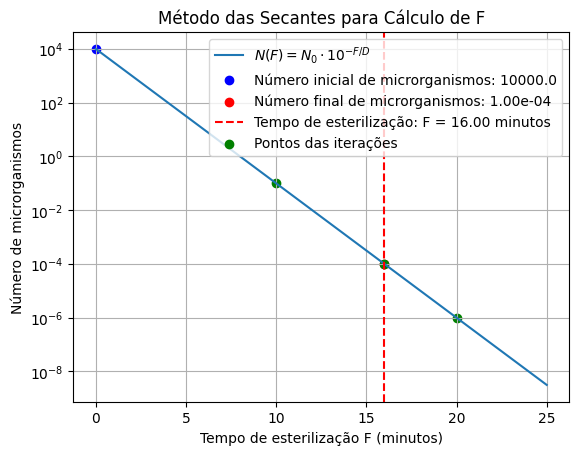

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(F, D, N0, N):
    """
    Calcula a diferença entre o logaritmo da redução de microrganismos e o tempo de esterilização.
    Parâmetros:
        F: Tempo de esterilização.
        D: Tempo de redução decimal.
        N0: Número inicial de microrganismos.
        N: Número final de microrganismos.
    Retorna:
        Valor de f(F).
    """
    return np.log10(N0 / N) - (F / D)

def secantes(f, x0, x1, tol, max_iter, D, N0, N):
    """
    Método das secantes para encontrar a raiz da função f(F).
    Parâmetros:
        f: Função para a qual se deseja encontrar a raiz.
        x0, x1: Chutes iniciais.
        tol: Tolerância para convergência.
        max_iter: Número máximo de iterações.
        D, N0, N: Parâmetros da função f.
    Retorna:
        Aproximação da raiz, número de iterações, valores de x e f(x).
    """
    iteracoes = 0
    print(f"Estimativas iniciais: xa = {x0:.6f}; xb = {x1:.6f}\n")
    print("| i | x         | f(x)       | ER         |")
    print("|---|-----------|------------|------------|")

    x_values = [x0, x1]
    f_values = [f(x0, D, N0, N), f(x1, D, N0, N)]

    while iteracoes < max_iter:
        f_x0 = f(x0, D, N0, N)
        f_x1 = f(x1, D, N0, N)

        if iteracoes > 0:
            er = abs((x1 - x0) / x1)
        else:
            er = abs(x1 - x0) / x1 if x1 != 0 else 0

        print(f"| {iteracoes} | {x1:.8f} | {f_x1:.8f} | {er:.6e} |")

        if abs(f_x1) < tol:
            return x1, iteracoes, x_values, f_values

        if f_x1 == f_x0:
            raise ValueError("Divisão por zero: f(x1) == f(x0). Tente outros chutes iniciais.")

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        x0, x1 = x1, x2
        iteracoes += 1

        x_values.append(x1)
        f_values.append(f(x1, D, N0, N))

    raise ValueError(f"O método das secantes não convergiu após {max_iter} iterações.")

def validar_entradas(D, N0, N, x0, x1, tol, max_iter):
    """
    Valida as entradas para garantir que o método das secantes seja aplicável.
    Parâmetros:
        D, N0, N, x0, x1, tol, max_iter: Parâmetros do problema.
    Levanta:
        ValueError: Se alguma entrada for inválida.
    """
    if D <= 0 or N0 <= 0 or N <= 0:
        raise ValueError("D, N0 e N devem ser maiores que zero.")
    if x0 >= x1:
        raise ValueError("x0 deve ser menor que x1.")
    if tol <= 0:
        raise ValueError("A tolerância deve ser positiva.")
    if max_iter <= 0:
        raise ValueError("O número máximo de iterações deve ser positivo.")

def numero_microrganismos(F, D, N0):
    """
    Calcula o número de microrganismos após um tempo de esterilização F.
    Parâmetros:
        F: Tempo de esterilização.
        D: Tempo de redução decimal.
        N0: Número inicial de microrganismos.
    Retorna:
        Número de microrganismos no tempo F.
    """
    return N0 * 10**(-F / D)

# Parâmetros
D = 2
N0 = 1e4
N = 1e-4
x0 = 10
x1 = 20
tol = 1e-6
max_iter = 200

# Validação das entradas
try:
    validar_entradas(D, N0, N, x0, x1, tol, max_iter)
except ValueError as e:
    print(f"Erro na validação: {e}")
    exit()

# Aplicação do método das secantes
try:
    F, iteracoes, x_values, f_values = secantes(f, x0, x1, tol, max_iter, D, N0, N)
    print(f"\nSolução obtida: x = {F:.6f}")
except ValueError as e:
    print(f"Erro durante a execução do método: {e}")
    exit()

# Exportação dos resultados
# resultados = pd.DataFrame({"x": x_values, "f(x)": f_values})
# resultados.to_csv("resultados_secantes.csv", index=False)

# Plotagem do gráfico
F_values_plot = np.linspace(0, 25, 500)
N_values_plot = numero_microrganismos(F_values_plot, D, N0)

plt.plot(F_values_plot, N_values_plot, label=r"$N(F) = N_0 \cdot 10^{-F/D}$")
plt.scatter(0, N0, color='blue', label=f"Número inicial de microrganismos: {N0}")
plt.scatter(F, N, color='red', label=f"Número final de microrganismos: {N:.2e}")
plt.axvline(F, color='red', linestyle='--', label=f"Tempo de esterilização: F = {F:.2f} minutos")
plt.scatter(x_values, numero_microrganismos(np.array(x_values), D, N0), color='green', label="Pontos das iterações")

plt.xlabel("Tempo de esterilização F (minutos)")
plt.ylabel("Número de microrganismos")
plt.title("Método das Secantes para Cálculo de F")
plt.legend()
plt.grid()
plt.yscale('log')
#plt.savefig("grafico_secantes.png", dpi=300)
plt.show()

 # Método da bisseção
 tempo de esterilização necessário para reduzir a população de microrganismos

---

**Definição da Função \( f(F) \)**:
   - A função \( f(F) \) é definida como:
     \[
     f(F) = \log_{10}\left(\frac{N_0}{N}\right) - \left(\frac{F}{D}\right)
     \]
   - Onde:
     - \( F \): Tempo de esterilização.
     - \( D \): Tempo de redução decimal (minutos).
     - \( N_0 \): Número inicial de microrganismos.
     - \( N \): Número final de microrganismos.
---

**Parâmetros do Problema**:
   - \( D = 1.5 \): Tempo de redução decimal.
   - \( N_0 = 100 \): Número inicial de microrganismos.
   - \( N = 10^{-4} \): Número final de microrganismos.
   - \( a = 5 \): Limite inferior do intervalo.
   - \( b = 15 \): Limite superior do intervalo.
   - \( tol = 10^{-6} \): Tolerância para convergência.
   - \( max\_iter = 100 \): Número máximo de iterações.

---

Estimativas iniciais: a = 5.000000; b = 15.000000

| i | a         | b         | x         | f(x)       | ER         |
|---|-----------|-----------|-----------|------------|------------|
| 0 | 5.00000000 | 15.00000000 | 10.00000000 | -0.66666667 | 1.000000e+00 |
| 1 | 5.00000000 | 10.00000000 | 7.50000000 | 1.00000000 | 3.333333e-01 |
| 2 | 7.50000000 | 10.00000000 | 8.75000000 | 0.16666667 | 1.428571e-01 |
| 3 | 8.75000000 | 10.00000000 | 9.37500000 | -0.25000000 | 6.666667e-02 |
| 4 | 8.75000000 | 9.37500000 | 9.06250000 | -0.04166667 | 3.448276e-02 |
| 5 | 8.75000000 | 9.06250000 | 8.90625000 | 0.06250000 | 1.754386e-02 |
| 6 | 8.90625000 | 9.06250000 | 8.98437500 | 0.01041667 | 8.695652e-03 |
| 7 | 8.98437500 | 9.06250000 | 9.02343750 | -0.01562500 | 4.329004e-03 |
| 8 | 8.98437500 | 9.02343750 | 9.00390625 | -0.00260417 | 2.169197e-03 |
| 9 | 8.98437500 | 9.00390625 | 8.99414062 | 0.00390625 | 1.085776e-03 |
| 10 | 8.99414062 | 9.00390625 | 8.99902344 | 0.00065104 | 5.425936e-04 |

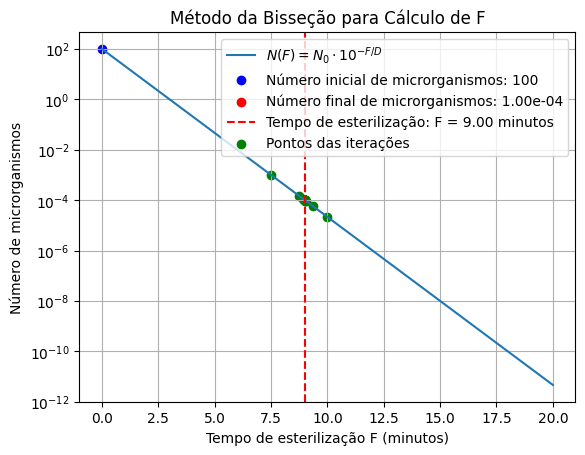

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(F, D, N0, N):
    return np.log10(N0 / N) - (F / D)

def bissecao(f, a, b, tol, max_iter, D, N0, N):
    iteracoes = 0
    print(f"Estimativas iniciais: a = {a:.6f}; b = {b:.6f}\n")
    print("| i | a         | b         | x         | f(x)       | ER         |")
    print("|---|-----------|-----------|-----------|------------|------------|")

    x_values = []
    f_values = []

    while iteracoes < max_iter:
        x = (a + b) / 2
        f_x = f(x, D, N0, N)

        if iteracoes > 0:
            er = abs((x - x_prev) / x)
        else:
            er = abs((b - a) / x) if x != 0 else 0

        print(f"| {iteracoes} | {a:.8f} | {b:.8f} | {x:.8f} | {f_x:.8f} | {er:.6e} |")

        x_values.append(x)
        f_values.append(f_x)

        if abs(f_x) < tol:
            return x, iteracoes, x_values, f_values

        if f(a, D, N0, N) * f_x < 0:
            b = x
        else:
            a = x

        x_prev = x
        iteracoes += 1

    raise ValueError(f"O método da bisseção não convergiu após {max_iter} iterações.")

D = 1.5
N0 = 100
N = 1e-4
a = 5
b = 15
tol = 1e-6
max_iter = 100

try:
    F, iteracoes, x_values, f_values = bissecao(f, a, b, tol, max_iter, D, N0, N)
    print(f"\nSolução obtida: x = {F:.6f}")
except ValueError as e:
    print(f"Erro: {e}")

def numero_microrganismos(F, D, N0):
    return N0 * 10**(-F / D)

F_values_plot = np.linspace(0, 20, 500)
N_values_plot = numero_microrganismos(F_values_plot, D, N0)

plt.plot(F_values_plot, N_values_plot, label=r"$N(F) = N_0 \cdot 10^{-F/D}$")
plt.scatter(0, N0, color='blue', label=f"Número inicial de microrganismos: {N0}")
plt.scatter(F, N, color='red', label=f"Número final de microrganismos: {N:.2e}")
plt.axvline(F, color='red', linestyle='--', label=f"Tempo de esterilização: F = {F:.2f} minutos")
plt.scatter(x_values, numero_microrganismos(np.array(x_values), D, N0), color='green', label="Pontos das iterações")

plt.xlabel("Tempo de esterilização F (minutos)")
plt.ylabel("Número de microrganismos")
plt.title("Método da Bisseção para Cálculo de F")
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()